# HW3

## Q2: K-means clustering (40 pts)
    1. Given a K-means clustering model, run it on the iris dataset 20 times. Report the average NMI value along with its std (Normalized Mutual Information (NMI) is a standard clustering evaluation method. Basically, a higher NMI value indicates better clustering performance. More details could be referred to usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and this [introduction](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)). Save the best clustering result by NMI for the following steps. (10 pts)
    2. Repeat step 1 for the given spectral clustering and hierarchical clustering models. Compare the clustering performance of these three methods by averaged NMI$\pm$std. (10 pts) 
    3. Plot the best and worst clustering results of K-means by NMI. (20 pts)

We will directly use the Sklearn libary for running K-means, spectral clustering, and hierarchical clustering. More details about the function usage could be referred to [Sklearn cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) and this [tutorial](https://scikit-learn.org/stable/modules/clustering.html).

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
import numpy as np

dataset = load_iris()
X = dataset.data
gnd = dataset.target
semantic_labels = dataset.target_names
print(semantic_labels)
print(gnd)
K = len(set(gnd)) # get the ground-truth cluster number

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Q1-1: K-means (20 pts)
Given a K-means model, run it 20 times to report average NMI and std value. Save the clustering labels of each trial for the following steps.

In [7]:
km = KMeans(n_clusters=K, init='random', n_init=1)
idx, nmis = [], []
for i in range(20):
    # run K-means here
    km.fit(X)
    # idx.append(the obtained clustering labels)
    idx.append(km.labels_)
    # nmi.append(nmi_score(gnd, clustering label))
    nmis.append(nmi_score(gnd,km.labels_))
    
# report mean and std values of nmis
print("mean")
print(np.mean(nmis))
print("std")
print(np.std(nmis))




mean
0.7183860570012086
std
0.06574592583863464


### Q1-2: Compare K-means with SC and AC (20 pts)
Repeat Q1-1 with the following two given models.

In [9]:
sc = SpectralClustering(n_clusters=K, n_init=1) # spectral clustering model
ac = AgglomerativeClustering(n_clusters=K) # hierarchical clustering model
# TODO: repeat Q1-1 and compare km with sc and ac
acidx, acnmis = [],[]
scidx, scnmis = [],[] 
for i in range(20):
    sc.fit(X)
    ac.fit(X)
    scidx.append(sc.labels_)
    acidx.append(ac.labels_)
    scnmis.append(nmi_score(gnd,sc.labels_))
    acnmis.append(nmi_score(gnd,ac.labels_))
print("ac mean")
print(np.mean(acnmis))
print("sc mean")
print(np.mean(scnmis))
print("ac std")
print(np.std(acnmis))
print("sc std")
print(np.std(scnmis))
    
# print the comparion results

ac mean
0.770083661648787
sc mean
0.7979885217013318
ac std
0.0
sc std
1.1102230246251565e-16


### Q1-3: Plot K-means clustering results (20 pts)

0.7581756800057785
0.5873776041729258


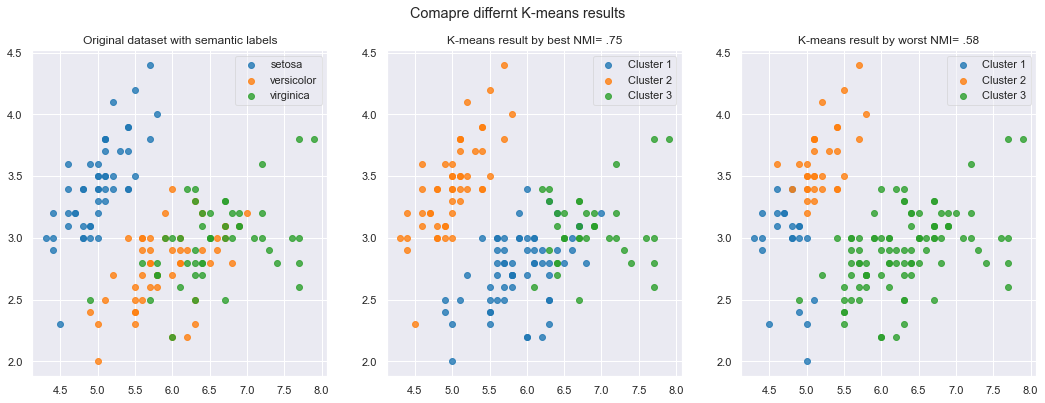

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

clustering_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# TODO: 
# 1) find the best/worst clustering labels by NMI, termed as bst_idx and wst_idx
maxindex = nmis.index(max(nmis))
print(max(nmis))
bst_idx = idx[maxindex]
minindex = nmis.index(min(nmis))
print(min(nmis))
wst_idx = idx[minindex]

# 2) scatter plot the data samples upon the clustering labels, bst_idx and wst_idx.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle('Comapre differnt K-means results')
colors = ['tab:blue', 'tab:orange', 'tab:green']
ax1.set_title('Original dataset with semantic labels')
# fill out the NMI values in the title
ax2.set_title('K-means result by best NMI= .75')
ax3.set_title('K-means result by worst NMI= .58')

for color, i in zip(colors, [0, 1, 2]):
    ax1.scatter(X[gnd == i, 0], X[gnd == i, 1], color=color, alpha=.8, label=semantic_labels[i])
    ax2.scatter(X[bst_idx == i, 0], X[bst_idx ==i,1], color = color, alpha = .8, label = clustering_labels[i]) #plot with bst_idx and clsutering_labels
    ax3.scatter(X[wst_idx == i, 0], X[wst_idx ==i,1], color = color, alpha = .8, label = clustering_labels[i]) #plot with wst_idx and clsutering_labels
ax1.legend(fancybox=True, framealpha=0.5)

# TODO: add legends for ax2 and ax3
ax2.legend(fancybox=True, framealpha=0.5)
ax3.legend(fancybox=True, framealpha=0.5)

Answer the following questions:
- Can we use the semantic_labels for the clustering results plot? Why? 
- Why does the same clustering label (e.g., clustering 1) have different groups of samples between two K-means results?

Please directly answer the above question with Markdown inside this notebook file.

In [ ]:
No we cannot use semantic_labels for the clustersing results becuase the kmeans doesnt know the labels 
assosciated with each cluster, it only groups them



K means has a random starting point and finds a local minima not necessarily the global one.
